In [1]:
using StatsPlots
using DataFrames
using Distributions

# 场景：模拟选择，100 个选项，不能回头比较，如何选
1. 策略：100 个随机值，先观察前 n 个，记下最大值；之后碰到第一个比它大的，就停下；问：n 应该取多少？有人说取前 1/3，对吗？

In [2]:
# 模拟一次
function oneRound(skipNums = 34)
    # 模拟随机的 100 个机会
    a = rand(1000)
    
    # 前 n 个为观测值，记录最大值
    bs = maximum(a[1:skipNums], dims=1)[1]

    # 剩余的选项
    left = a[skipNums + 1:end]

    # 只要碰到一个比 bs 大，就停止
    goal = left[1]
    i = 1
    l = length(left)
    while i <= l
        goal = left[i] 
        if goal > bs 
            break 
        end 
        i = i + 1
    end 
    
    return goal
end     

# 选不同的参数(应该跳过几个更好)，在每个参数下，模拟若干次，看均值
function simulate_skips()
    # 对每个参数模拟 1w 次
    s = 2000

    # 模拟的参数
    r = range(200, step=100, stop=800)

    # 模拟的结果，两维
    f = zeros(s, length(r))
    for n in 1:length(r) 
        let i = 1
            while i <= s
                f[i, n] = oneRound(n)
                i += 1
            end
        end 
    end
    
    return f
end 

simulate_skips (generic function with 1 method)

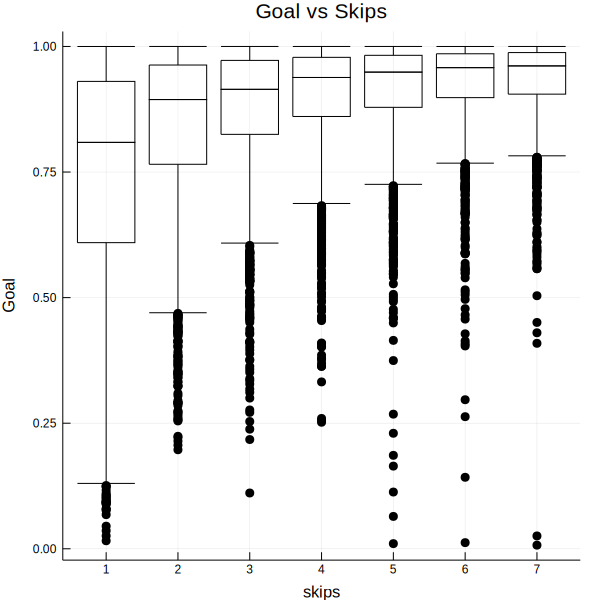

In [3]:
f = simulate_skips()

gr(size=(600,600))

boxplot(f, title="Goal vs Skips", 
    legend=false, 
    color=false, 
    xlabel="skips", ylabel="Goal")

## 结论：原先的策略（观察前 1/3 的最大值，在后续碰到第一个更大的就停止），并不怎么好
1. 30 到 40 到 50 都有明显的提升，50 之后提升不大；
2. 无论跳过多少，都有很多极端情况，但是总体来看是越来越集中；
3. 结论：应该两分法，一半用来观察，剩下一半用来选择； ==》 和 随即分布(均匀分布) 是一致的